# Session 4: Fitting to arbitrary functions

_Script author: louise.dash@ucl.ac.uk    
Updated: 05/01/2018_

<div class="alert alert-success"> <p>*  **Intended learning outcomes:** * </p>
By the end of this session, you should be able to:
<ul>
<li> fit data to any arbitrary function using scipy.optimize.curve_fit; </li>
<li> quantitatively evaluate the goodness of fit;  </li>
<li> reach physical conclusions based on these results. </li>
</div>

We've already seen how to fit histograms to a Gaussian, and how to use a polynomial to fit a set of data. The last thing we're going to do in this Data Analysis part of the course is to see how to perform a fit to an arbitrary function. 

In these examples, we'll be looking at whether a Lorentzian or Gaussian functions provide a better fit to some optical lineshape data. However, you can use the same method to fit *any* function, provided you can write a suitable Python function to describe your target "fit" function.

### Context for this example

The data we'll use for this session is taken from the Lab 3 Zeeman effect experiment, which some of you will do yourselves in PHAS3440. 

The Zeeman effect occurs when a spectral line is split into different components by a magnetic field. The physics of the Zeeman effect will be covered in detail in PHAS2224 "Atomic and Molecular Physics".

The Lab 3 experiment examines how the lines in the emission spectrum of a mercury discharge lamp split under a magnetic field. The student records the spectrum using a CCD camera, which yields data in the form of recorded intensity (in counts per second) vs pixel position (in pixels). 

We're not going to be considering the *positions* of the spectral lines in this task, instead we're going to be looking at the *lineshapes*. Rather than a spectral line with a single energy, the line is broadened into a wider peak by various physical effects. For example, the uncertainty principle leads to broadening which has a Lorentzian form, while there will also be thermal broadening effects, which are Gaussian in nature (there are also several other sources of broadening, with different effects). In theory, for this experiment, Lorentzian broadening is expected to dominate.

In this task we will look at an experimental spectral line recorded by a student in the Lab 3 experiment, fit it to both a Gaussian and Lorentzian, and determine which provides a better fit.

### Getting started with the code

First, we'll import the modules we will need. The new function we import in the cell below comes from the scipy.optimize library - more on this later, when we come to use it. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize
%matplotlib inline 


Now we can import the csv (Comma Separated Value) file with the data the student collected, and plot it. You will need to download this file from Moodle, and as usual, put it in the same directory as this notebook.

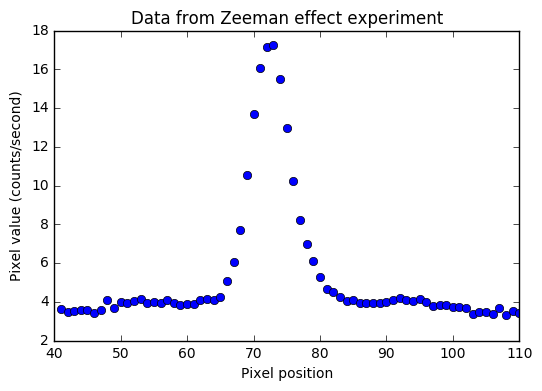

In [2]:
# import the data...
xdata,ydata = np.loadtxt('Zeeman_data.csv',delimiter=",",unpack=True) # reminder: need to set delimiter for csv files

# ...and plot it.
plt.figure()
plt.plot(xdata,ydata, 'o')
plt.xlabel("Pixel position")
plt.ylabel("Pixel value (counts/second)")
plt.title("Data from Zeeman effect experiment");

We can see that we have a single peak with a constant background level. It looks feasible to attempt fitting this to a Gaussian.


In order to use `curve_fit` to fit this to a Gaussian, we need to write a "target" function to fit to, which in this case will be


$$
f(x) = y_0 + h \exp \left(\frac{-(x-x_0)^2}{2 \sigma^2}\right)
$$

(This is a slightly different definition than the one we used when we were fitting histograms to Gaussians in Session 2. Can you see why?)

The parameters for our Gaussian fit will be the mean value (`x0`), the standard deviation (`sigma`), the background value `y0` and the peak height, `h`. Here is a function that will do exactly this.

In [3]:
def gaussian(x,x0,sigma, y0, h):
    '''Returns a single value or 1D array of Gaussian function values for 
    - input x-value or array of x-values: x
    - mean value of distribution: x0
    - standard deviation of distribution: sigma
    - background value y0
    - peak height, h (measured from background level y0)'''
    gauss = h * np.exp(-(x-x0)**2/(2*sigma**2)) + y0 # the gaussian itself
    return gauss

The three parameters, x0, y0 and sigma, are (as yet) unknown. To find them, we use the scipy.optimize.curve_fit function. The full documentation for this is here: http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

We're going to do this in the simplest way possible for the moment, by just sending curve_fit the target function (our "`gaussian`" function), the independent variable (`xdata`) and the dependent variable (`ydata`). We can also, optionally, choose to send an initial guess of the parameters, as well as weightings for each of the ydata data points, but for the moment we won't do that.

The `curve_fit` routine returns two arrays. 
 * The first of these is an array of the fitted parameters - in our case this array will have four elements, as we have four parameters, `x0`, `sigma`, `y0`, and `h`.
 * The second is the matrix of covariance - an indication of the goodness of fit. We covered this in Session 3 when we were doing polynomial fitting.
 
 Let's do this, and see what results we get back:

In [4]:
#popt: Optimized parameters
#pcov: matrix of covariance.
popt,pcov = curve_fit(gaussian,xdata,ydata)

print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [ 1.          1.          5.30499999  1.        ]
pcov :
 [[ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]
 [ inf  inf  inf  inf]]


/Users/gracehymas/Downloads/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


We can see that this hasn't worked so well - `curve_fit` hasn't been able to find a fit to the data.

Instead, we'll try to make life easier for `curve_fit` by giving an initial guess for the parameters. From looking at the plot of the data, we can see that the peak is at around $x=75$, and the background around $y=3.5$. We'll try a value of 10 for $\sigma$. These values need to be given in the form of a python list of numbers, in the same order as parameters are given to our "`gaussian`" function. Remember - in Python we use `[` square brackets `]` to define a list, with the elements separated by commas.

In [5]:
guess = [75,10,3.5,18] # list of initial guess parameters
# what type of object does the variable "guess" represent?
print ("The variable 'guess' is a ", type(guess) )

The variable 'guess' is a  <class 'list'>


Now we can retry the fit:

In [6]:
popt,pcov = curve_fit(gaussian,xdata,ydata,p0=guess)
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [ 72.50930905   3.01525268   3.85742572  13.40680376]
pcov :
 [[  2.02507205e-03  -3.77758184e-10   4.14321753e-12   1.66043777e-09]
 [ -3.77758184e-10   2.22561784e-03  -6.30519920e-04  -4.05620885e-03]
 [  4.14321753e-12  -6.30519920e-04   1.98236679e-03  -1.40174499e-03]
 [  1.66043777e-09  -4.05620885e-03  -1.40174499e-03   3.10175058e-02]]


This has worked (or it should have done)! We can use the information from the matrix of covariance to calculate the error on each parameter, just as we did in the previous session for the polynomial coefficients. Remember, the error on the parameters are given by the *square roots* of the diagonal elements of the matrix of covariance.


**A python aside / hint: ** When dealing with an array like `popt` that contains numbers each representing different variables, it's sometimes useful to be able to "unpack" the array into different variables - we've already seen examples of this in the code cell above and in the second code cell when unpacking the data from the file. To unpack `popt`, we could use a line of code like:

           x0_fit, sigma_fit, y0_fit, h_fit = popt

If we wanted to then calculate the fitted line at a given x-value (in this case at x = 65), we could then use something like:
        
           fitted_point = gaussian(65, x0_fit, sigma_fit, y0_fit, h_fit)
           
or, if we don't want/need to assign individual variable names to the elements of `popt` (or whichever array we are dealing with), we could use:

           fitted_point = gaussian(65, popt[0], popt[1], popt[2], popt[3])
           
This is a bit unwieldy though, so sometimes it's useful to be able to unpack the array automatically when calling a function by using \* syntax, like this:

           fitted_point = gaussian(65, *popt)
This is much easier to deal with! You can find a fuller discussion of this in [Hill: Learning Scientific Programming with Python](http://sfx.ucl.ac.uk/sfx_local?ctx_ver=Z39.88-2004&ctx_enc=info:ofi/enc:UTF-8&ctx_tim=2016-07-18T13%3A15%3A47IST&url_ver=Z39.88-2004&url_ctx_fmt=infofi/fmt:kev:mtx:ctx&rfr_id=info:sid/primo.exlibrisgroup.com:primo3-Journal-UCL_LMS_DS&rft_val_fmt=info:ofi/fmt:kev:mtx:book&rft.genre=book&rft.atitle=&rft.jtitle=&rft.btitle=Learning%20scientific%20programming%20with%20Python&rft.aulast=Hill&rft.auinit=&rft.auinit1=&rft.auinitm=&rft.ausuffix=&rft.au=Hill,%20Christian,%201974-,%20author&rft.aucorp=&rft.volume=&rft.issue=&rft.part=&rft.quarter=&rft.ssn=&rft.spage=&rft.epage=&rft.pages=&rft.artnum=&rft.issn=&rft.eissn=&rft.isbn=9781107075412&rft.sici=&rft.coden=&rft_id=info:doi/&rft.object_id=&rft.856_url=&rft_dat=%3CUCL_LMS_DS%3E002240476%3C/UCL_LMS_DS%3E&rft.eisbn=&rft_id=info:oai/&req.language=eng) section 2.4.3 (page 49).

The code cell below demonstrates that the two methods do give identical results:

In [7]:
# specifying the elements by hand:
print("At x = 65 our fitted Gaussian has a value of: ", gaussian(65, popt[0], popt[1], popt[2], popt[3]))

# use *syntax to unpack the elements of popt automatically:
print("Calculating the same value using * syntax:    ", gaussian(65,*popt)) 
print("Both give the same result!")

At x = 65 our fitted Gaussian has a value of:  4.46069838805
Calculating the same value using * syntax:     4.46069838805
Both give the same result!


<div class="alert alert-success"> 
In the cell below, you should:
<ul>
<li> calculate the errors on the parameters </li>
<li>output each parameter with its error and an appropriate text string </li>
<li>plot the original data and the fitted line on a single, appropriately labelled graph </li>
</ul>
</div>

In [8]:
for i in range(np.size(popt)):
    print("coefficient order x^", len(popt)-i-1, " is ", popt[i], " with error ", np.diag(pcov)[i]**0.5)
    # - 1 since two degrees for the fit results in three coefficients
    # popt is is polynomial of optimized parameters fitted earlier
    # coviarience matrix used for error, only diagonal elements are uncertainties

coefficient order x^ 3  is  72.5093090483  with error  0.0450008005788
coefficient order x^ 2  is  3.015252675  with error  0.0471764543221
coefficient order x^ 1  is  3.85742572033  with error  0.0445237778376
coefficient order x^ 0  is  13.4068037567  with error  0.176117874705


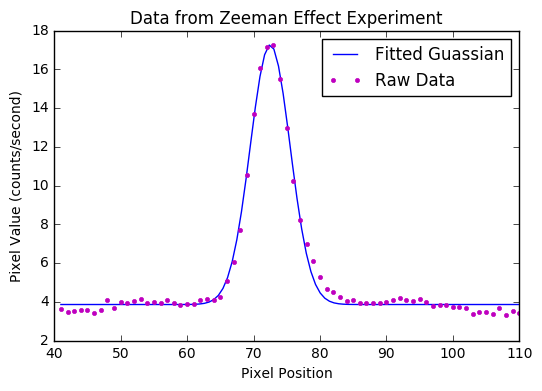

In [9]:
line = np.poly1d(popt)                                # generates polynomial as function
x = np.linspace(np.min(xdata),np.max(xdata),100)      # creates array between minimum and maximum x data with 100 points  
y = gaussian(x,*popt)                                 # fitting Gaussian with specified variables
plt.plot(x,y,'b-', label="Fitted Guassian")           # plotting fitted Gaussian with label
plt.plot(xdata,ydata, 'm.', label = "Raw Data")       # plotting raw data with label
plt.xlabel("Pixel Position")                          # labelling and titling the graph
plt.ylabel("Pixel Value (counts/second)")
plt.title("Data from Zeeman Effect Experiment")
plt.legend(loc='best')                                # plotting legend and placing at best position

If you've done this correctly, you should obtain a good fit to the data.

In theory we'd expect a Lorentzian to produce a better fit for this data. Now you're going to try this out and see if this is what we find for this particular data set!

The appropriate form for this is 
$$
f(x) = y_0 + \frac{h}{1 + ((x - x_0)/b)^2}
$$
where $y_0$ is the background level, $x_0$ is the peak position and $b$ is the half-width at half-maximum (HWHM) of the peak.

<div class="alert alert-success"> 
First, write a properly formatted python function, similar in form to the "gaussian" function above, that will return a Lorentzian function for these parameters.
</div>

In [10]:
def lorentzian(x,x0,b,y0,h):                                    # defining the function and specifying inputs
    '''Returns the Lorentzian function for inputs:
    - input array of x-values: x
    - mean value of distribution: x0
    - background value y0
    - peak height, h (measured from background level y0)'''
    fx = y0 + h/(1+((x-x0)/b)**2)                               # given formula
    return fx                                                   # returning the necessary function

<div class="alert alert-success"> 
Now provide an initial guess for these parameters, and use curve_fit to calculate the best Lorentzian fit for this data. Output the calculated parameters and the matrix of covariance, just like we did for the Gaussian fit.
</div>

In [11]:
x0, b, y0, h = 75.0, 3.5, 10.0, 75.0
guess = [x0,y0, b, h]                                      # putting values into array
popt,pcov = curve_fit(lorentzian,xdata,ydata,p0=guess)     # returns an array of fitted parameters and a matrix of covarience
print ("popt :\n", popt)
print ("pcov :\n", pcov)

popt :
 [ 72.48067296   3.08299491   3.36145907  14.88520194]
pcov :
 [[  3.41528811e-03   1.97154219e-06  -3.26726578e-06   1.19665229e-06]
 [  1.97154219e-06   9.19549065e-03  -3.39317449e-03  -1.57727713e-02]
 [ -3.26726578e-06  -3.39317449e-03   4.90695457e-03  -1.07971997e-03]
 [  1.19665229e-06  -1.57727713e-02  -1.07971997e-03   7.98995628e-02]]


<div class="alert alert-success"> 
Now use these results to
<ul>
<li>calculate the error on each parameter</li>
<li>output each parameter with its error (and an appropriate text string)</li>
<li>plot the data, the fitted Gaussian and the fitted Lorentzian, all on the same labelled graph.</li>
</ul>
</div>

In [12]:
print("For parameter x0,the value is ", popt[0], " with error ", np.diag(pcov)[0]**0.5)    # printing variables using optimised polynomials
print("For parameter y0,the value is ", popt[1], " with error ", np.diag(pcov)[1]**0.5)
print("For parameter b,the value is ", popt[2], " with error ", np.diag(pcov)[2]**0.5)
print("For parameter h,the value is ", popt[3], " with error ", np.diag(pcov)[3]**0.5)

For parameter x0,the value is  72.480672959  with error  0.058440466375
For parameter y0,the value is  3.08299490733  with error  0.0958931209603
For parameter b,the value is  3.36145906975  with error  0.0700496579094
For parameter h,the value is  14.8852019443  with error  0.282665107069


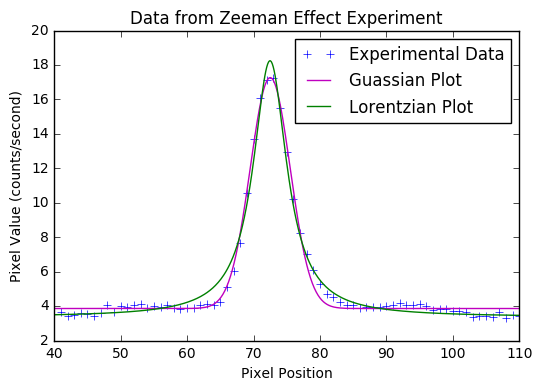

In [13]:
xdummy = np.linspace(40,110,500)   # creating x values in an array          

poptg,pcovg = curve_fit(gaussian,xdata,ydata,p0=guess)    # finding optimised parameters and covarience matrices for Gaussian
poptL,pcovL = curve_fit(lorentzian,xdata,ydata,p0=guess)  # finding optimised parameters and covarience matrices for Lorentzian


plt.plot(xdata,ydata, 'b+', label="Experimental Data")                      # plotting raw data
plt.plot(xdummy,gaussian(xdummy,*poptg),'m-', label="Guassian Plot")        # plotting Gaussian data
plt.plot(xdummy,lorentzian(xdummy,*poptL), 'g-', label="Lorentzian Plot")   # plotting Lorentz data
plt.xlabel("Pixel Position")                                                # plotting useful labels, titles and legend
plt.ylabel("Pixel Value (counts/second)")
plt.legend(loc=0)
plt.title("Data from Zeeman Effect Experiment")

### Evaluating the goodness of fit

So now we have two potential fits to our data. Looking at them, it's hard to tell which one provides the better fit. We can do this quantitatively by calculating $\chi^2$ for each fit, in the same way as we did in the previous session. 

We'll also need to know the y-error on the data points for this - which for this experiment were estimated to be $\pm 1$ counts/second.

#### 1. Gaussian.

First we'll look at the Gaussian fit. 

<div class="alert alert-success"> 
In the cell below, 
<ul>
<li>calculate the residuals divided by the y-error</li>
<li>calculate the number of degrees of freedom</li>
<li>hence calculate $\chi^2$ for the Gaussian fit.</li>
</ul>
(Refer back to the previous session if you need a reminder of any of the definitions)
</div>


In [25]:
gresiduals = (gaussian(xdata,*poptg) - ydata)                   # finding Gaussian residuals
dof = np.size(xdata) - np.size(poptg)                          # degrees of freedom from sizes of xdata and Gaussian polynimals
chi_squared_g = (np.sum(gresiduals**2/dof))                    # finding chi squared using normal formula
print("The residuals are:",gresiduals)                         # printing
print("There are %d degres of freedom" %dof)
print("The value of chi squared is:",chi_squared_g)

The residuals are: [  5.43561995e-01   1.01856200e+00   8.93561995e-01   6.68561995e-01
   7.68561995e-01   1.11856200e+00   6.68561995e-01  -5.81438005e-01
   4.43561995e-01  -3.56438005e-01  -2.31438005e-01  -4.81438002e-01
  -7.06437978e-01  -1.31437785e-01  -3.56436409e-01  -2.31427641e-01
  -5.81377714e-01  -1.31123798e-01   9.50289298e-02  -3.02674170e-04
   1.65497883e-02  -5.04278629e-01  -4.74425043e-01   4.35445789e-02
   5.76750767e-01   1.78997495e-01   8.32897368e-01   1.39854728e+00
   2.95167506e-01  -8.49445010e-01  -1.01105221e+00  -1.64186558e-01
  -4.55330500e-01   5.54937005e-01   1.09725853e+00   1.21766525e+00
   1.24985503e-01  -1.47056852e+00  -2.27730491e+00  -1.99990222e+00
  -1.42047934e+00  -1.36986633e+00  -8.52601252e-01  -4.57902321e-01
  -5.75143566e-01  -1.29929942e-01  -2.31114326e-01  -2.31375769e-01
  -2.31427285e-01  -3.56436351e-01  -5.81437776e-01  -8.06437977e-01
  -5.81438002e-01  -4.81438005e-01  -7.06438005e-01  -3.56438005e-01
   2.18561995e-

#### 2. Lorentzian

<div class="alert alert-success"> Now do the same for the Lorentzian fit, in the cell below.</div>

In [24]:
residualsL = (lorentzian(xdata,*poptL) - ydata)            # finding Lorentzian residuals
dof = np.size(xdata) - np.size(poptL)                       # degrees of freedom sizes from of xdata and Lorentz polynimals
chi_squared_l = np.sum(residualsL**2/dof)                   # finding REDUCED chi squared from given formula
print("The residuals are:",residualsL)                      # printing all
print("There are %d degres of freedom" %dof)
print("The value of chi squared is:",chi_squared_l)

The residuals are: [-0.34283807  0.15549964  0.05621801 -0.14034914 -0.00880767  0.37631045
 -0.03443572 -1.2403741  -0.1656912  -0.90939512 -0.72026683 -0.89679529
 -1.03709019 -0.36376293 -0.47376227 -0.21314396 -0.401743    0.24230091
  0.70324252  0.89378148  1.2566732   1.14225219  1.61247017  2.5224862
  3.23157372  2.54616189  2.2235327   1.16067655 -1.61125689 -3.2078448
 -1.58310729  1.88353637  1.41486763 -0.40493552 -1.65825023 -1.01347644
 -0.35330796 -0.24662682 -0.0201942   0.58414135  1.01271172  0.68636516
  0.77223187  0.76602409  0.30634078  0.4682031   0.13409062 -0.05853771
 -0.21882736 -0.47856186 -0.81785138 -1.14060028 -0.99983043 -0.97290846
 -1.26170805 -0.96772749 -0.44217596 -0.61103764 -0.65011993 -0.46009006
 -0.49150319 -0.39482422  0.37955528  0.1313036   0.11013831  0.31581772
 -0.50186593  0.38190798 -0.08301609  0.12822651]
There are 66 degres of freedom
The value of chi squared is: 1.2048472766


Lorentzian $\chi^2$ is 0.192775564257

Gaussian $\chi^2$ is 0.106981944238

Lorenzian is a better fit as its $\chi^2$ value is highest, closest to 1 which is ideal. This is as expected from the hypothesis as Lotentzian broadening (uncertainty principle) dominates our data over Gaussian broadening (thermal effects). The closer the value is to 0 the more we must deem the fit 'too good'. This would mean that in adding data points the function would not be able to extrapolate the line therefore it is not useful. This is as expected from the hypothesis. However both $\chi^2$ values are far less than  one indicating that both do not fit the plot too well. 

### STUDENT COMPLETED TEXT CELL ###

### Analysing the residuals

Another way of verifying the validity of our fits is to check the distribution of the residuals, and see if they follow a normal (Gaussian) distribution. Again, follow the same procedure as we did in the previous session and check the distribution of the calculated residuals for both fits. 




<div class="alert alert-success">
Do this in the code cells below. 
<ul>
<li>You can copy, paste and edit code from Session 3 if you want, rather than writing this from scratch. </li>
<li>Then, use a text cell to discuss (briefly) what you conclude from these results.</li>
<li> You will also find it useful to look at the $x_0$ and $\sigma$ of the pdf of the residuals. Try changing your value of the yerror in the data (that you used to calculate the $\chi^2$) to the $\sigma$ you obtain here. What does this tell you?</li>
<li>Don't forget to change the yerror back to the value recorded by the student before submitting!</li>
</ul>
</div>

The mean value is  -2.27100687462e-11 and the standard deviation is 0.426332989256


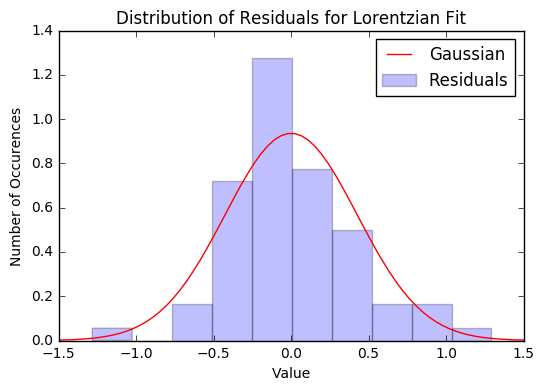

In [22]:
x = np.linspace(-1.5,1.5,70)                                           # creating an array of x values
x0, sigma = stats.norm.fit(residualsL)                                 # fits Gaussian to data
plt.hist(residualsL,normed=True,alpha=0.25,label="Residuals")          # plotting histogram of residuals
plt.plot(x,stats.norm.pdf(x,x0,sigma),'r-', label="Gaussian")          # plotting Gaussian fit
plt.xlabel("Value")                                                    # plotting labels title and legend
plt.ylabel("Number of Occurences")
plt.title("Distribution of Residuals for Lorentzian Fit")              
print("The mean value is ",x0,"and the standard deviation is", sigma)  # printing needed values
plt.legend(loc='best')


The mean value is  6.57021611719e-11 and the standard deviation is 0.31759831593


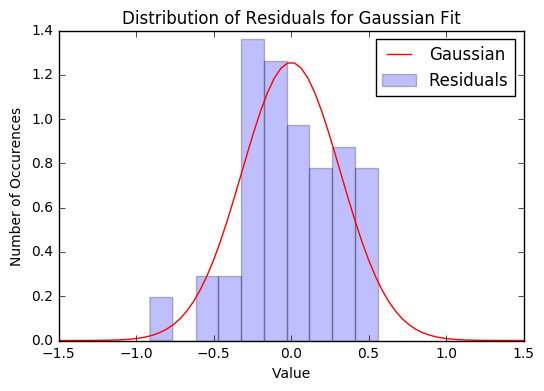

In [23]:
x = np.linspace(-1.5,1.5,70)
x0, sigma = stats.norm.fit(gresiduals)
plt.hist(gresiduals,normed=True,alpha=0.25,label="Residuals")
plt.plot(x,stats.norm.pdf(x,x0,sigma),'r-', label="Gaussian")
plt.xlabel("Value")
plt.ylabel("Number of Occurences")
plt.title("Distribution of Residuals for Gaussian Fit")
print("The mean value is ",x0,"and the standard deviation is", sigma)
plt.legend(loc='best')

Lorentzian residuals have a more Gaussian distribution by eye indicating that the Lorentzian function fits better, and that the estimate of uncertainty in count rate is likely accurate.

Increasing uncertainty of our dependant variable to near the standard deviation of our Gaussian increases $\chi^2$ for both estimates. 